# Implementation of N-Step Sarsa Learning on FrozenLake-v1

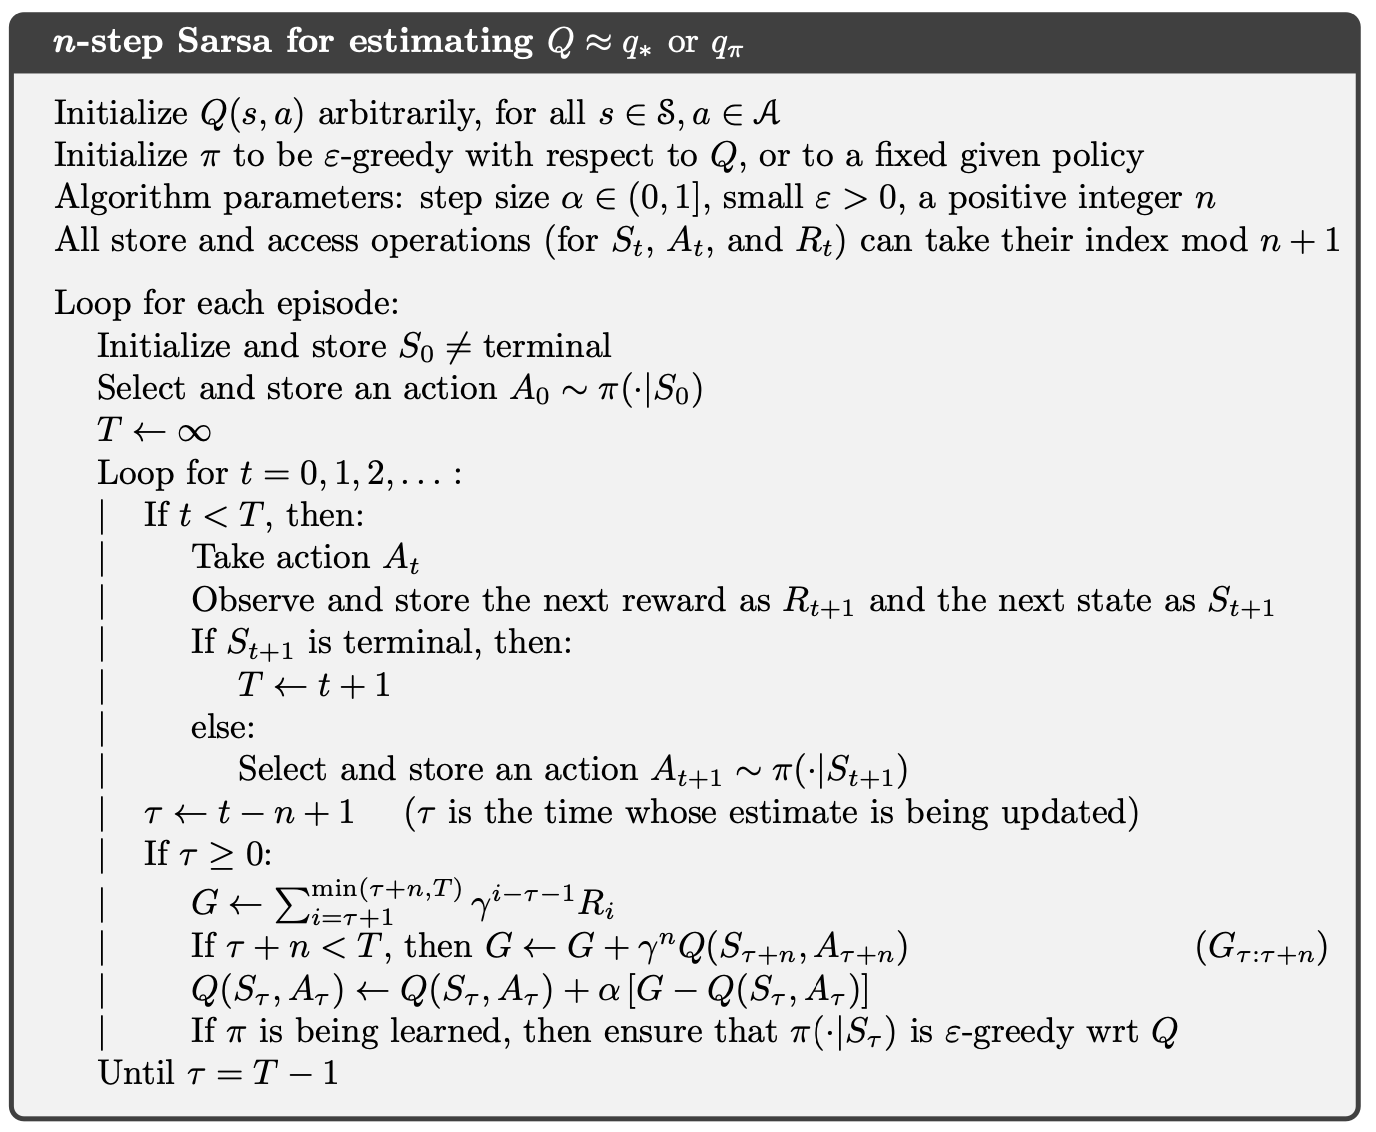

In [10]:
import gym
import numpy as np

# Function to do the episilon greedy action
def epsilonGreedy(epsilon, Q, state, env):
    action = None
    if np.random.random() < epsilon:
        action = env.action_space.sample()
    else:
        action = np.random.choice(np.where(Q[state] == Q[state].max())[0])
    return action

# Parameters
env = gym.make("FrozenLake-v1", map_name="4x4", is_slippery=False, render_mode="human")
nS = env.observation_space.n 
nA = env.action_space.n 
gamma = 0.98
alpha = 0.6
maxEpisodes = 1000
epsilon = 0.4
n = 2 # Number of Steps we want to take

# Initialization
Q = np.zeros([nS,nA])

# Looping Forever
for episode in range(maxEpisodes):
    initialState, _ = env.reset()
    action = epsilonGreedy(epsilon=epsilon, Q=Q, state=initialState, env=env)
    T = np.inf
    t = 0
    trajectory = [(initialState, action, 0)] # (State, Action, Reward)

    while True:
        if t < T:
            nextState, reward, done, _, _ = env.step(action)

            # If the agent is still on ice, then give penalty for not finding the treasure.
            if reward == 0:
                reward = -0.001
            
            # If the agent falls into the hole, give a large penalty
            if done and nextState != 15:
                reward = -1
            
            # If agent took too long, penalize
            if t == nS:
                done = True
                reward = -1
            
            # Penalize if agent doesnt move
            if initialState == nextState:
                reward = -1

            if nextState == 15 or done:
                T = t + 1
                trajectory.append((nextState, None, reward))
            else:
                action = epsilonGreedy(epsilon=epsilon, Q=Q, state=nextState, env=env)
                trajectory.append((nextState, action, reward))
                initialState = nextState
        
        tau = t - n + 1

        if tau >= 0:
            G = 0
            for i in range(tau+1, min(tau+n, T)+1):
                G += (gamma**(i-tau-1)) * trajectory[i][2]

            if tau + n < T:
                G += (gamma**(n)) * Q[trajectory[tau+n][0]][trajectory[tau+n][1]]

            Q[trajectory[tau][0]][trajectory[tau][1]] = Q[trajectory[tau][0]][trajectory[tau][1]] + alpha * (G - (Q[trajectory[tau][0]][trajectory[tau][1]]))
        
        if tau == T - 1:
            break

        t += 1

/Users/jasonchen/anaconda3/envs/rl/lib/python3.9/site-packages/gym/utils/passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


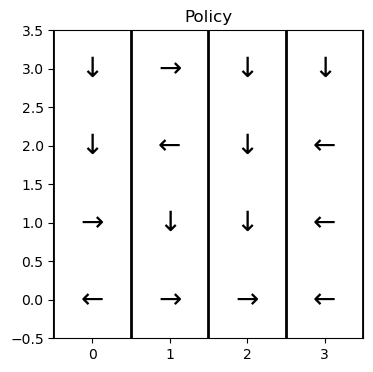

In [11]:
# Visualize the Policy
import matplotlib.pyplot as plt

def actionToArrow(action):
    if action == 0:
        return '←'
    elif action == 1:
        return '↓'
    elif action == 2:
        return '→'
    elif action == 3:
        return '↑'

nrow, ncol = 4, 4

fig, ax = plt.subplots(figsize=(ncol, nrow))
ax.set_xticks(np.arange(ncol+1)-0.5, minor=True)
ax.set_yticks(np.arange(nrow+1)-0.5, minor=True)
ax.grid(which="minor", color="black", linestyle='-', linewidth=2)
ax.tick_params(which="minor", size=0)
ax.set_xlim(-0.5, ncol-0.5)
ax.set_ylim(-0.5, nrow-0.5)
ax.set_title("Policy")
for i in range(nrow):
    for j in range(ncol):
        action = np.argmax(Q[i*ncol + j])
        arrow = actionToArrow(action)
        ax.text(j, nrow-1-i, arrow, ha='center', va='center', fontsize=20)
plt.show()
env.close()

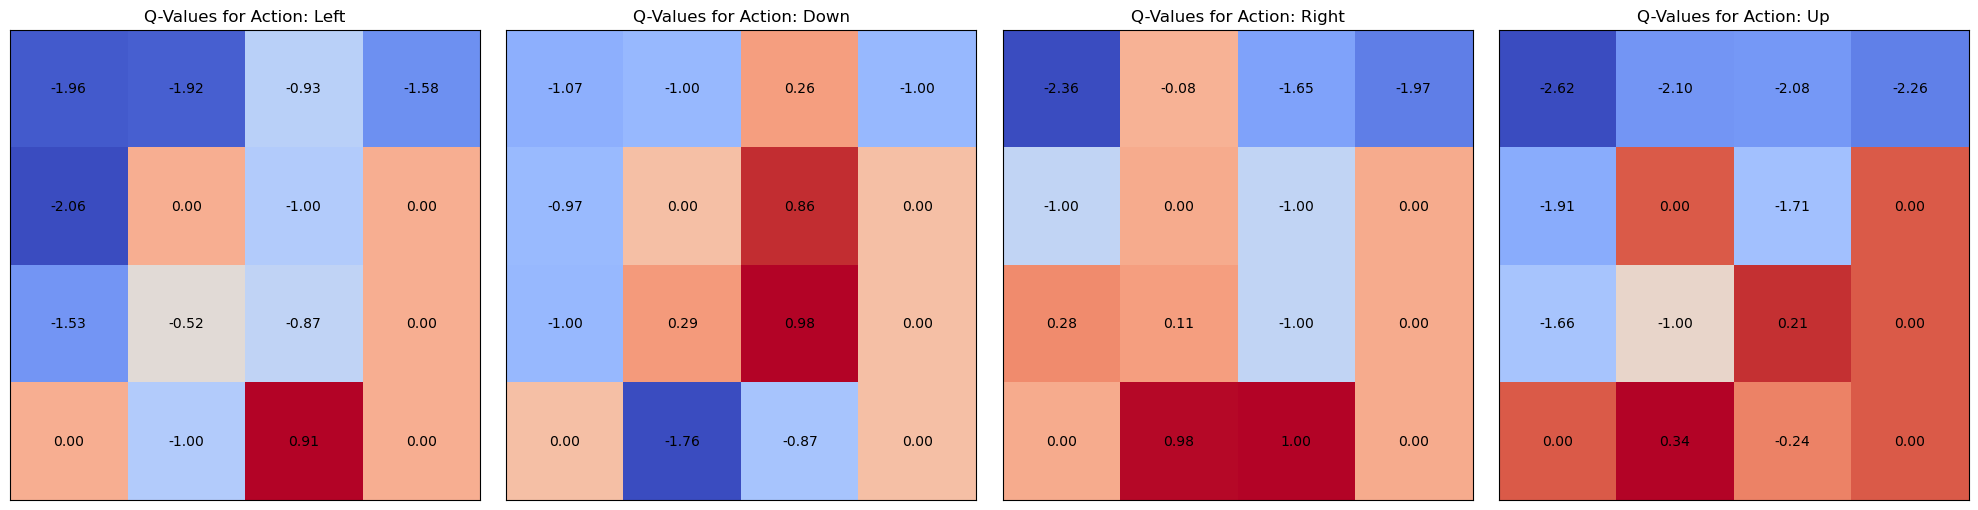

In [12]:
# Visualize the Policy
import matplotlib.pyplot as plt

# Visualize State Values as a Heatmap
fig, axes = plt.subplots(1, nA, figsize=(20, 5))
actions = ["Left", "Down", "Right", "Up"]

for i in range(nA):
    Q_action = Q[:, i].reshape((4, 4))
    ax = axes[i]
    cax = ax.matshow(Q_action, cmap="coolwarm")
    for (j, k), val in np.ndenumerate(Q_action):
        ax.text(k, j, f'{val:.2f}', ha='center', va='center', color='black')
    ax.set_title(f'Q-Values for Action: {actions[i]}')
    ax.set_xticks([])
    ax.set_yticks([])

# fig.colorbar(cax, ax=axes, orientation='vertical', fraction=0.025, pad=0.04)
plt.tight_layout()
plt.show()

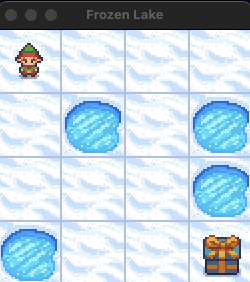

This is the layout of the map.

## N-Step Expected SARSA vs SARSA
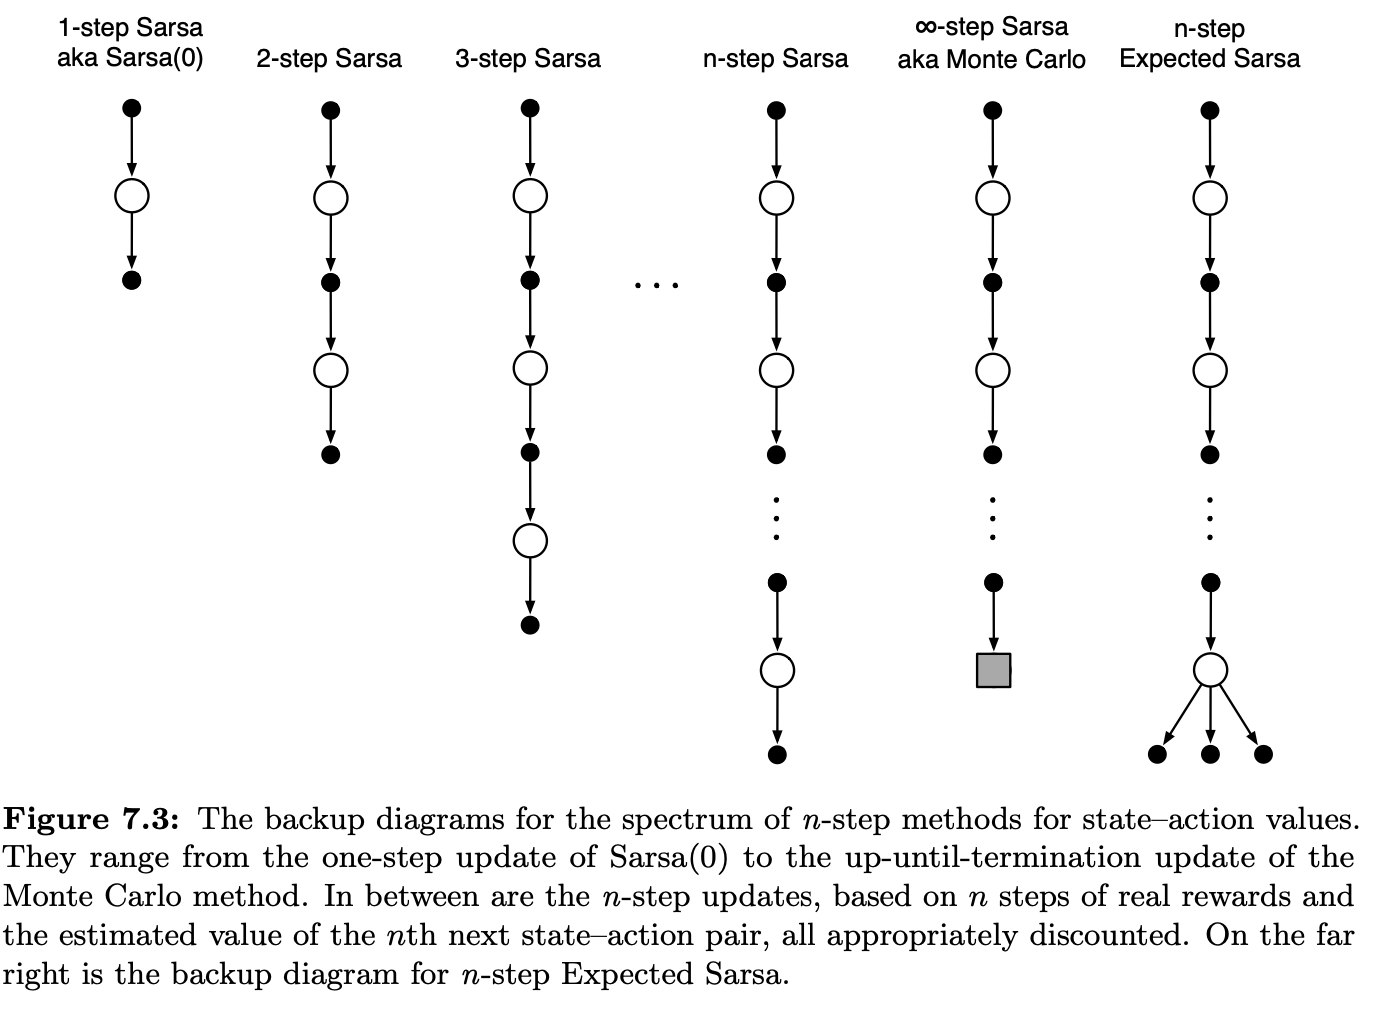

## Visualization of N-Step SARSA
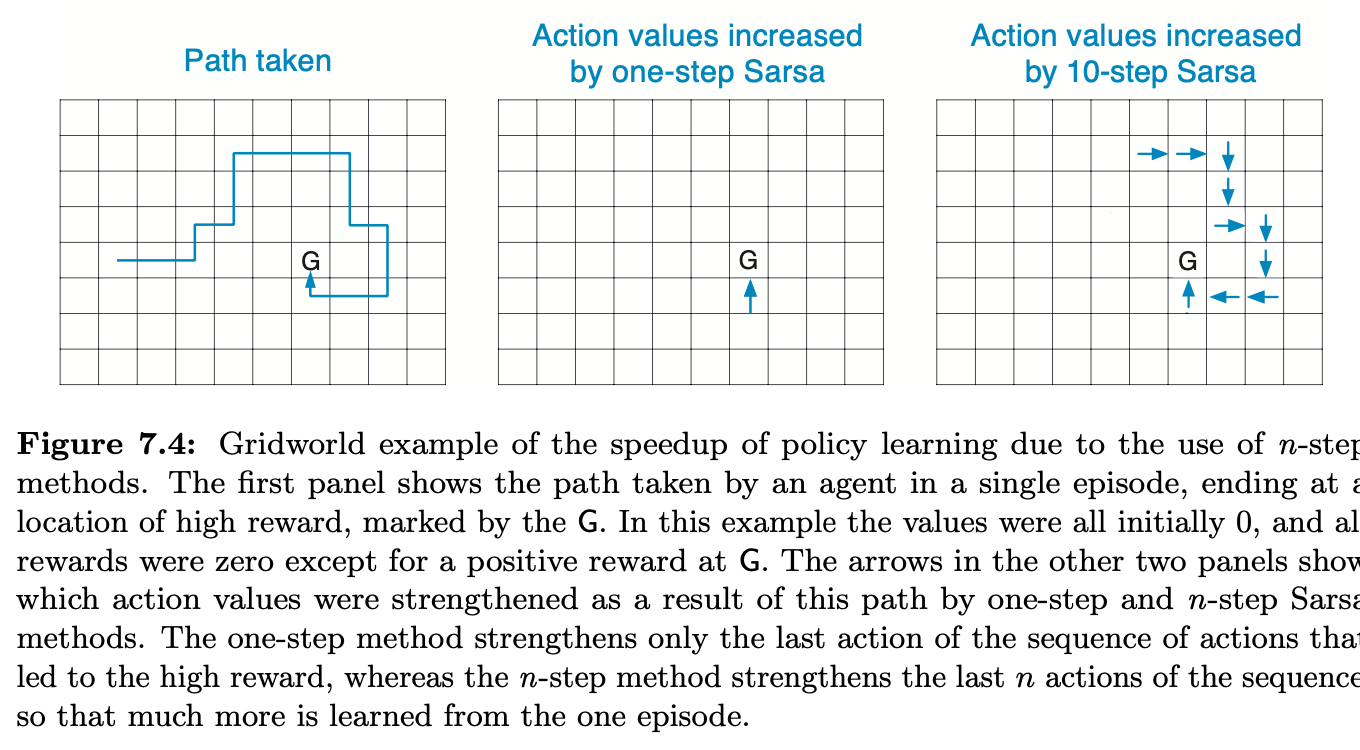

## Off-Policy Version of N-Step SARSA
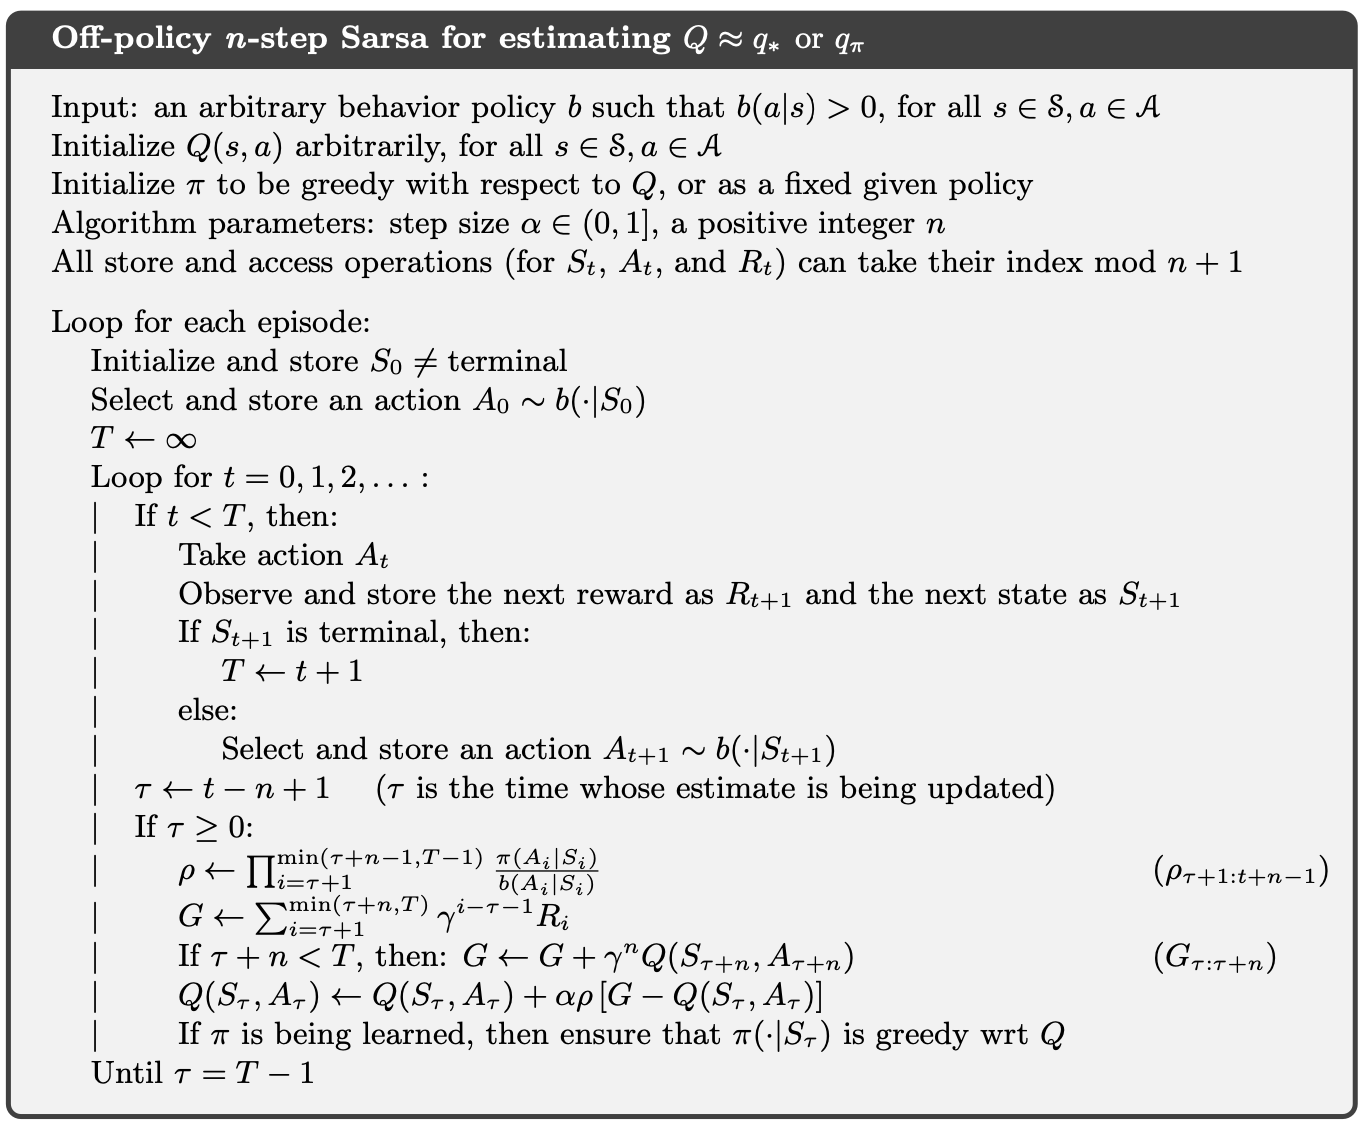